## **Components**
1. vae: AutoencoderKL
2. unet: UNet2DConditionModel
3. text_encoder: CLIPTextModel
4. tokenizer: CLIPTokenizer / CLIPTokenizerFast
5. scheduler: KarrasDiffusionSchedulers (e.g., Euler, DDIM, DPM-Solver)
6. feature_extractor: CLIPImageProcessor


### **1. VAE**

In [2]:
from typing import Any

from diffusers import AutoencoderKL

from petorch import AdapterAPI
from petorch.prebuilt.configs import LoraConfig
from petorch.utilities import freeze_module, get_module_num_parameters

model_id = "stabilityai/stable-diffusion-2-1"

vae_subfolder = "vae"
config = LoraConfig(adapter_name='default', rank=8, alpha=16)

vae: AutoencoderKL = AutoencoderKL.from_pretrained(model_id, subfolder=vae_subfolder)
frozen_params = freeze_module(vae)
vae_adapted_fqn = AdapterAPI.add_adapter(vae, config)
print(vae)
vae_train_params, vae_non_train_params = get_module_num_parameters(vae)
assert vae_non_train_params == frozen_params
print(f"Train params:{vae_train_params:,}, Non train params: {vae_non_train_params:,}")
print(vae_train_params / vae_non_train_params)

AutoencoderKL(
  (encoder): Encoder(
    (conv_in): LoraAdaptedLayer(
      (base_layer): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (active_adapters): ModuleDict()
      (non_active_adapters): ModuleDict(
        (default): LoraConv2d(
          (lora_dropout): Dropout(p=0.1, inplace=False)
          (lora_A): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (lora_B): Conv2d(8, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
      )
    )
    (down_blocks): ModuleList(
      (0): DownEncoderBlock2D(
        (resnets): ModuleList(
          (0-1): 2 x ResnetBlock2D(
            (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
            (conv1): LoraAdaptedLayer(
              (base_layer): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (active_adapters): ModuleDict()
              (non_active_adapters): ModuleDict(
                (default): LoraConv2d(
              

### **2. UNet**

In [3]:
from diffusers import UNet2DConditionModel

unet_subfolder = "unet"
unet = UNet2DConditionModel.from_pretrained(model_id, subfolder=unet_subfolder)
frozen_params = freeze_module(unet)
unet_adapted_fqn = AdapterAPI.add_adapter(unet, config)
print(unet)
unet_train_params, unet_non_train_params = get_module_num_parameters(unet)
assert unet_non_train_params == frozen_params
print(f"Train params:{unet_train_params:,}, Non train params: {unet_non_train_params:,}")
print(unet_train_params / unet_non_train_params)

UNet2DConditionModel(
  (conv_in): LoraAdaptedLayer(
    (base_layer): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (active_adapters): ModuleDict()
    (non_active_adapters): ModuleDict(
      (default): LoraConv2d(
        (lora_dropout): Dropout(p=0.1, inplace=False)
        (lora_A): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (lora_B): Conv2d(8, 320, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
    )
  )
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): LoraAdaptedLayer(
      (base_layer): Linear(in_features=320, out_features=1280, bias=True)
      (active_adapters): ModuleDict()
      (non_active_adapters): ModuleDict(
        (default): LoraLinear(
          (lora_dropout): Dropout(p=0.1, inplace=False)
          (lora_A): Linear(in_features=320, out_features=8, bias=False)
          (lora_B): Linear(in_features=8, out_features=1280, bias=False)
        )
      )
    )
    

### **3. Text encoder**

In [4]:
from transformers import CLIPTextModel

text_encoder_subfolder = "text_encoder"
text_encoder = CLIPTextModel.from_pretrained(model_id, subfolder=text_encoder_subfolder)

frozen_params = freeze_module(text_encoder)
text_encoder_adapted_fqn = AdapterAPI.add_adapter(text_encoder, config)
print(text_encoder)
text_encoder_train_params, text_encoder_non_train_params = get_module_num_parameters(text_encoder)
assert text_encoder_non_train_params == frozen_params
print(f"Train params:{text_encoder_train_params:,}, Non train params: {text_encoder_non_train_params:,}")
print(text_encoder_train_params / text_encoder_non_train_params)

CLIPTextModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): LoraAdaptedLayer(
        (base_layer): Embedding(49408, 1024)
        (active_adapters): ModuleDict()
        (non_active_adapters): ModuleDict(
          (default): LoraEmbedding(
            (lora_dropout): Dropout(p=0.1, inplace=False)
            (lora_A): ParamWrapper()
            (lora_B): ParamWrapper()
          )
        )
      )
      (position_embedding): LoraAdaptedLayer(
        (base_layer): Embedding(77, 1024)
        (active_adapters): ModuleDict()
        (non_active_adapters): ModuleDict(
          (default): LoraEmbedding(
            (lora_dropout): Dropout(p=0.1, inplace=False)
            (lora_A): ParamWrapper()
            (lora_B): ParamWrapper()
          )
        )
      )
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-22): 23 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): LoraAdapted

### **4. Tokenizer**

In [5]:
from transformers import CLIPTokenizerFast

tokenizer_subfolder = "tokenizer"
tokenizer = CLIPTokenizerFast.from_pretrained(model_id, subfolder=tokenizer_subfolder)
tokenizer

CLIPTokenizerFast(name_or_path='stabilityai/stable-diffusion-2-1', vocab_size=49408, model_max_length=77, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|startoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '!'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("!", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	49406: AddedToken("<|startoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	49407: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}
)

### **5. Scheduler**

In [6]:
from diffusers import DPMSolverMultistepScheduler, UniPCMultistepScheduler

scheduler_subfolder = "scheduler"
scheduler: DPMSolverMultistepScheduler = DPMSolverMultistepScheduler.from_pretrained(model_id,
                                                                                     subfolder=scheduler_subfolder)
scheduler

DPMSolverMultistepScheduler {
  "_class_name": "DPMSolverMultistepScheduler",
  "_diffusers_version": "0.34.0",
  "algorithm_type": "dpmsolver++",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "dynamic_thresholding_ratio": 0.995,
  "euler_at_final": false,
  "final_sigmas_type": "zero",
  "flow_shift": 1.0,
  "lambda_min_clipped": -Infinity,
  "lower_order_final": true,
  "num_train_timesteps": 1000,
  "prediction_type": "v_prediction",
  "rescale_betas_zero_snr": false,
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "solver_order": 2,
  "solver_type": "midpoint",
  "steps_offset": 1,
  "thresholding": false,
  "timestep_spacing": "linspace",
  "trained_betas": null,
  "use_beta_sigmas": false,
  "use_exponential_sigmas": false,
  "use_flow_sigmas": false,
  "use_karras_sigmas": false,
  "use_lu_lambdas": false,
  "variance_type": null
}

### **6. Feature extractor**

In [7]:
from transformers import CLIPImageProcessor

feature_extractor_subfolder = "feature_extractor"
feature_extractor = CLIPImageProcessor.from_pretrained(model_id, subfolder=feature_extractor_subfolder)
feature_extractor

CLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

### **Parameters**

In [8]:
train_params = vae_train_params + unet_train_params + text_encoder_train_params
non_train_params = vae_non_train_params + unet_non_train_params + text_encoder_non_train_params
print(f"Train params: {train_params:,}, Non train params: {non_train_params:,} ")
print(train_params / non_train_params)

Train params: 14,099,128, Non train params: 1,289,952,427 
0.01092995966741958


## **Inference**

In [9]:
import torch
from transformers import BatchEncoding
from transformers.modeling_outputs import BaseModelOutputWithPooling

prompt = ["A red frog is on the tree.", "The Eagle is on the blonde woman's shoulder."]
batch_size = len(prompt)
height, width = 512, 512

text_input: BatchEncoding = tokenizer(prompt, return_tensors='pt', padding=True)
with torch.no_grad():
    text_encoder_output: BaseModelOutputWithPooling = text_encoder(input_ids := text_input.input_ids)
print(input_ids.shape)
print(text_encoder_output.keys())

text_embeddings = text_encoder_output.last_hidden_state
text_embeddings.shape

torch.Size([2, 12])
odict_keys(['last_hidden_state', 'pooler_output'])


torch.Size([2, 12, 1024])

In [ ]:
from tqdm.auto import tqdm

# The height and width are divided by 8 because the vae model has 3 down-sampling layers.
assert 2 ** (len(vae.config.block_out_channels) - 1) == 8
latents = torch.randn((batch_size, unet.config.in_channels, height // 8, width // 8), )
latents = latents * scheduler.init_noise_sigma
print(latents.shape)

guidance_scale = 7.5
num_inference_steps = 10

# For CFG
uncond_input = tokenizer([""] * batch_size, padding="max_length", max_length=input_ids.shape[-1], return_tensors="pt")
uncond_embeddings = text_encoder(uncond_input.input_ids).last_hidden_state
text_embeddings_with_uncond = torch.cat([uncond_embeddings, text_embeddings])
print(text_embeddings_with_uncond.shape)

all_latents = [latents.clone()]

scheduler.set_timesteps(num_inference_steps)
for t in tqdm(scheduler.timesteps):
    # expand the latents if we are doing classifier-free guidance to avoid doing two forward passes.
    latent_model_input = torch.cat([latents] * 2)

    latent_model_input = scheduler.scale_model_input(latent_model_input, timestep=t)

    # predict the noise residual
    with torch.no_grad():
        noise_pred = unet(latent_model_input, t, encoder_hidden_states=text_embeddings_with_uncond).sample

    # perform guidance
    noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)
    noise_pred = noise_pred_uncond + guidance_scale * (noise_pred_text - noise_pred_uncond)

    # compute the previous noisy sample x_t -> x_t-1
    latents = scheduler.step(noise_pred, t, latents).prev_sample
    all_latents.append(latents.clone())
all_latents[0].shape

torch.Size([2, 4, 64, 64])
torch.Size([4, 12, 1024])


  0%|          | 0/10 [00:00<?, ?it/s]

In [66]:
images = []
for i in tqdm(range(len(all_latents))):
    latent = all_latents[i]
    latent = latent / vae.config.scaling_factor
    with torch.no_grad():
        image = vae.decode(latent).sample
    image = (image / 2 + 0.5).clamp(0, 1).squeeze()
    image = (image.permute(0, 2, 3, 1) * 255).to(torch.uint8).cpu().numpy()
    images.append(image)

  0%|          | 0/11 [00:00<?, ?it/s]

In [72]:
print(len(images))
images[0].shape

11


(2, 512, 512, 3)

In [74]:
import numpy as np

images = np.stack(images).swapaxes(0, 1)
images.shape

(2, 11, 512, 512, 3)

10
10


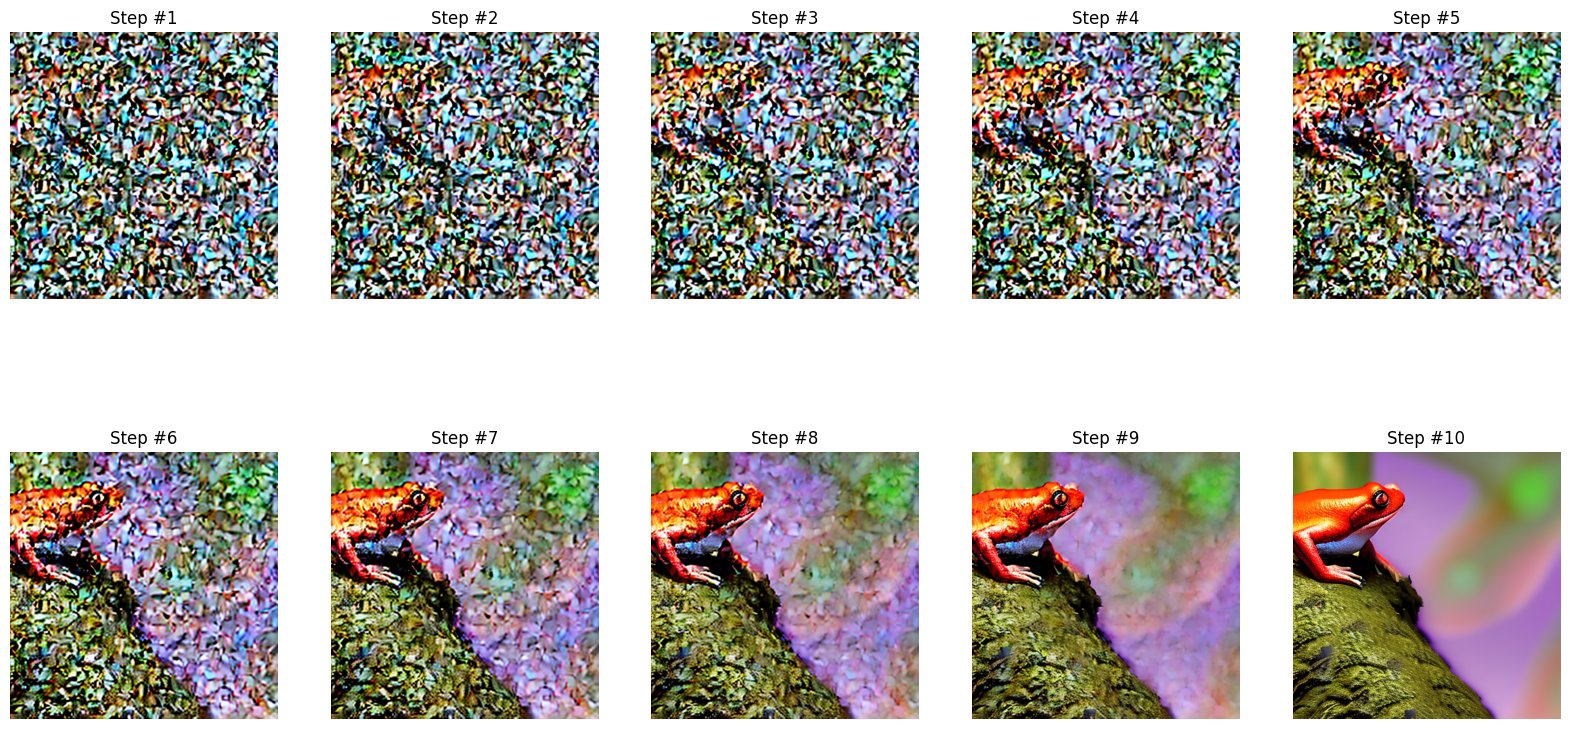

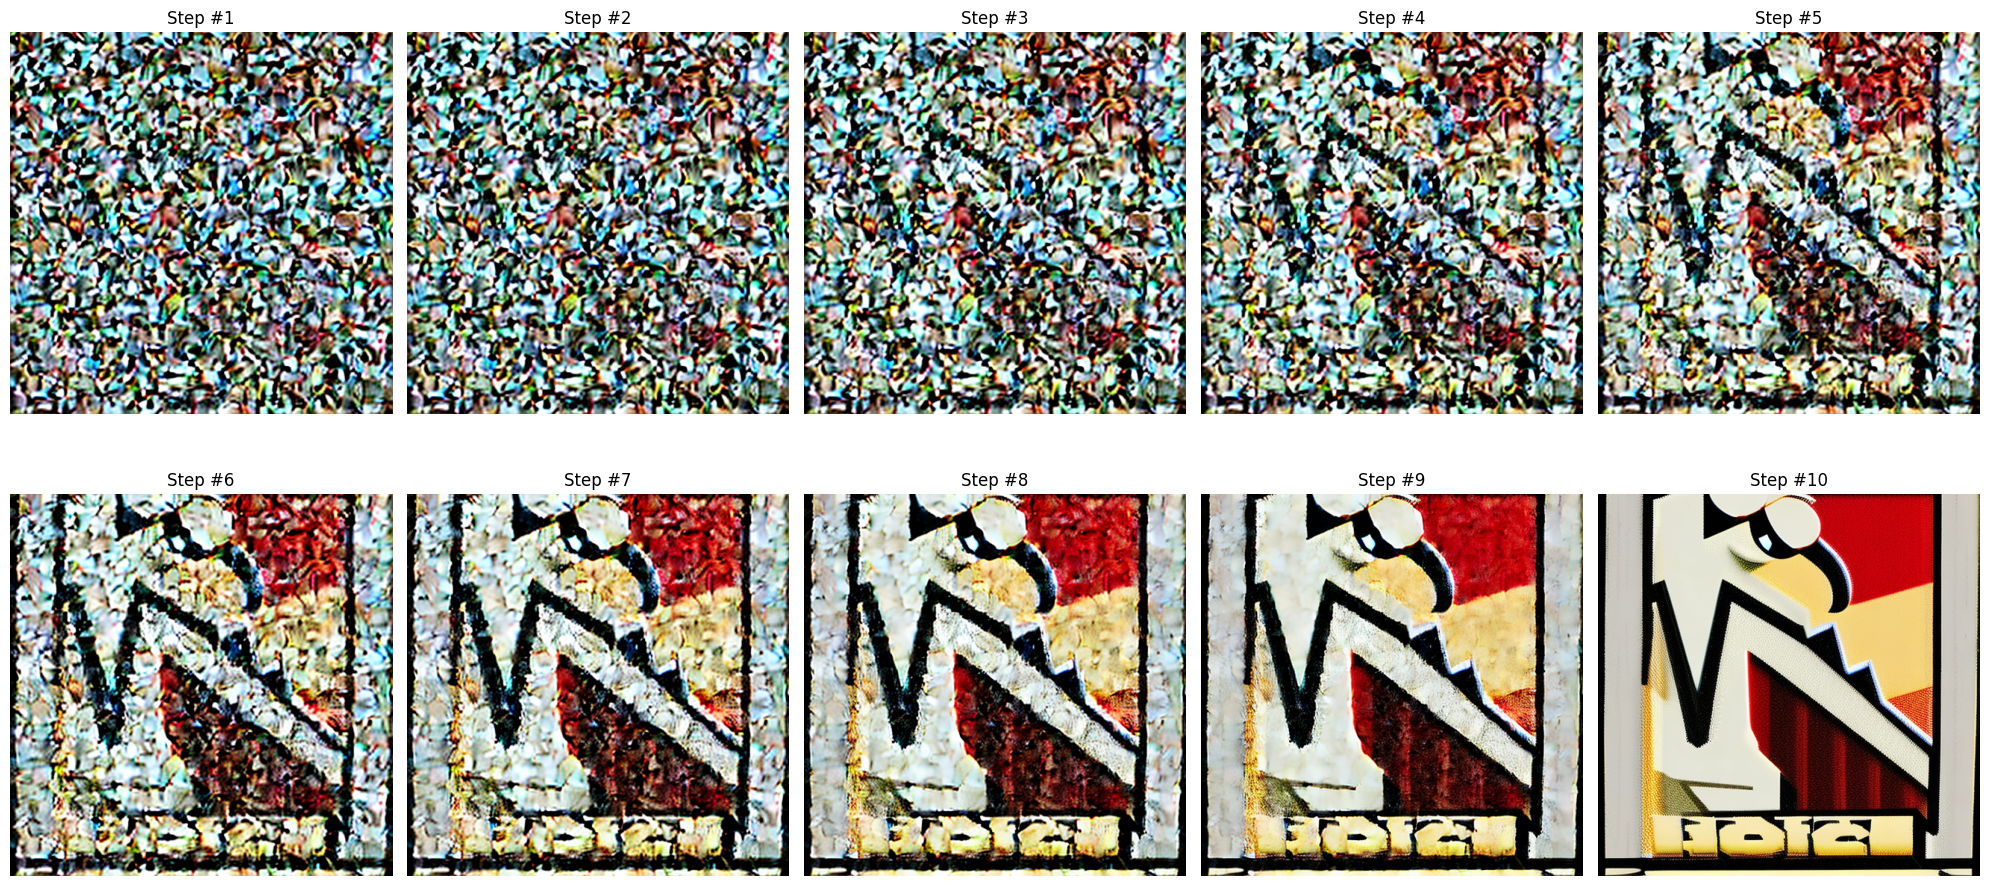

In [90]:
import matplotlib.pyplot as plt

for imgs in images:
    fig, axes = plt.subplots(len(imgs) // 5, 5, figsize=(20, 10))
    axes = axes.flatten()
    print(len(axes))
    for i in range(len(imgs)):
        if i > 0:
            ax = axes[i - 1]
            ax.imshow(imgs[i])
            ax.set_title(f"Step #{i}")
            ax.axis('off')
plt.tight_layout()
plt.show()

## **Training**

## **Module**

1. During training, Just the Conditional model and scheduler training like normal , no guildance concept, no classifier,... But there's probability that the prompt input become null.

2. During finetune. Exactly the same like training, but there is no longer the probability of prompt dropping.

3. During inference, this is the only time guidance come into play. There are three mode.

Case 1: If guideance scale >1, do CFG, concat the original input to the empty prompt input, such as:

prompt_embeds = torch.cat([negative_prompt_embeds, prompt_embeds])

latent_model_input = torch.cat([latents] * 2) if self.do_classifier_free_guidance else latents

Then forward pass like it has two inputs instead of one.

Then post process to get the final, like:

noise_pred_uncond, noise_pred_text = noise_pred.chunk(2)

noise_pred = noise_pred_uncond + self.guidance_scale * (noise_pred_text - noise_pred_uncond)



Case2: guidance scale <0. Model act like there is complely know about guildance, the result is just the unet forward, with embedded prompt in to it. you can not adjust (now output is more like prompt like the case1).



Case 3: 1>guidance scale>0. THis is the new method from paper "Common Diffusion Noise Schedules and Sample Steps are Flawed" of Shanchuan Lin,

,Bingchen Liu, Jiashi Li ,Xiao Yang



And not that all things about guidance is only exists, aware in inference mode.

